In [1]:
# using google collab so mounting the drive to import the required files 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# load some modules
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train_data = pd.read_csv('/content/drive/My Drive/Python for Data SCience /kaggle challenges/titanic/train.csv')

In [4]:
test_data = pd.read_csv('/content/drive/My Drive/Python for Data SCience /kaggle challenges/titanic/test.csv')

In [5]:
# lets view the train_data 
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test_data # viewing the test data 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
# checking out the data types for each feature
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# lets check out the missing values a
train_data.isna().sum() # we have 177 missing values in column age, 687 missing values in column cabin and 2 missing values in embarked 

# since the shape of our train dataset is 891 rows and 12 columns we can drop the cabin column as it is irration to impute 687 values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_data.isna().sum() # missing data for test datset

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
# recoding the sex column into a numeric column for maximum usability of the feature - note this will help us for correlation matrix and also with the imputation of the missing values 
train_data['Sex_code'] = np.where(train_data['Sex']=='male', '1', '0')
test_data['Sex_code'] = np.where(test_data['Sex']=='male', '1', '0')

print(train_data.dtypes)
print('')
print(test_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Sex_code        object
dtype: object

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Sex_code        object
dtype: object


In [11]:
# let's overwrite that column as a string instead of int64
train_data['Sex_code'] = train_data['Sex_code'].astype(int)
train_data.dtypes
test_data['Sex_code'] = test_data['Sex_code'].astype(int)

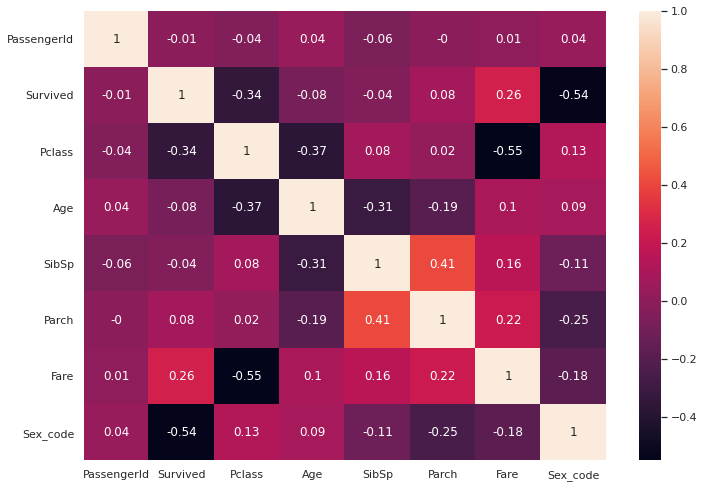

In [12]:
# correlation matrix to check out the correlation between each numeric features
# this matrix will also be useful to impute missing values more on that later 
# also note that sex column is in a string therefore to capture its maximum usablity we can recode as '1' for male and '0' for female
sns.set(rc={'figure.figsize':(11.7,8.27)})
correlation_matrix = train_data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
# annot = True to print the values inside the square

## lets visualise the data 

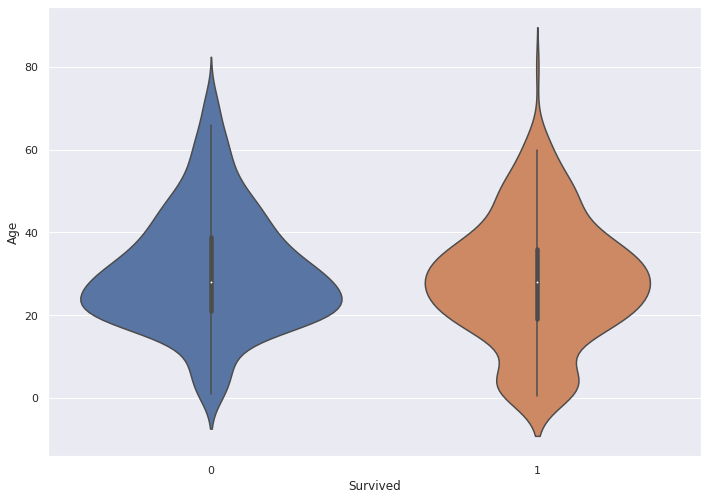

In [13]:
# lets plot a violin plot 
ax = sns.violinplot(x="Survived", y="Age", data=train_data) # we can see that very young age have higher survival rate 

In [14]:
train_data['Pclass'] = train_data['Pclass'].astype(str)

test_data['Pclass'] = test_data['Pclass'].astype(str)

In [15]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Sex_code         int64
dtype: object

In [16]:
# https://pbpython.com/categorical-encoding.html
recode = {"Pclass": {"1":'Upper', "2":'Middle', "3":'Lower'}}

In [17]:
train_data.replace(recode, inplace=True)
test_data.replace(recode, inplace=True)

In [18]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code
0,1,0,Lower,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,Upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,Lower,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,Upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,Lower,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Middle,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,Upper,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,Lower,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,Upper,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [19]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code
0,892,Lower,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,Lower,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,Middle,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,Lower,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,Lower,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,Lower,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
414,1306,Upper,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,Lower,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
416,1308,Lower,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1


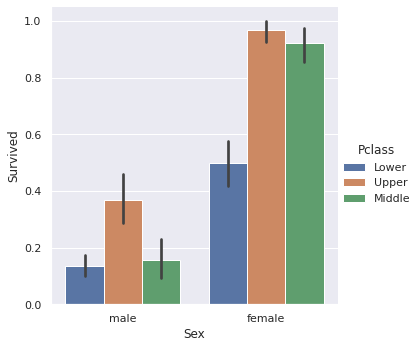

In [20]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=train_data);

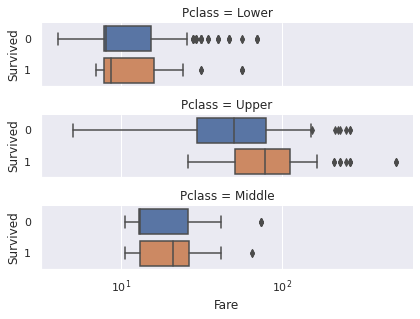

In [21]:
g = sns.catplot(x="Fare", y="Survived", row="Pclass",
                kind="box", orient="h", height=1.5, aspect=4,
                data=train_data.query("Fare > 0"))
g.set(xscale="log");

In [22]:
import plotly.express as px
df = train_data
fig = px.histogram(df, x="Age", color="Survived", barmode='group')
fig.show()

In [23]:
df = train_data
fig = px.histogram(df, x="Fare", color="Survived", barmode='group')
fig.show()

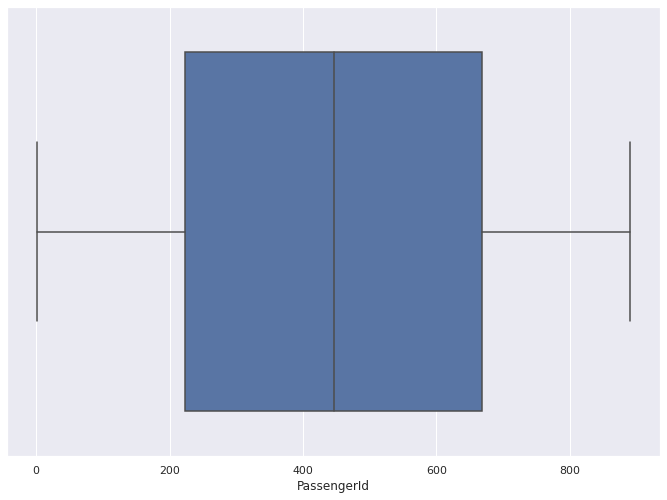

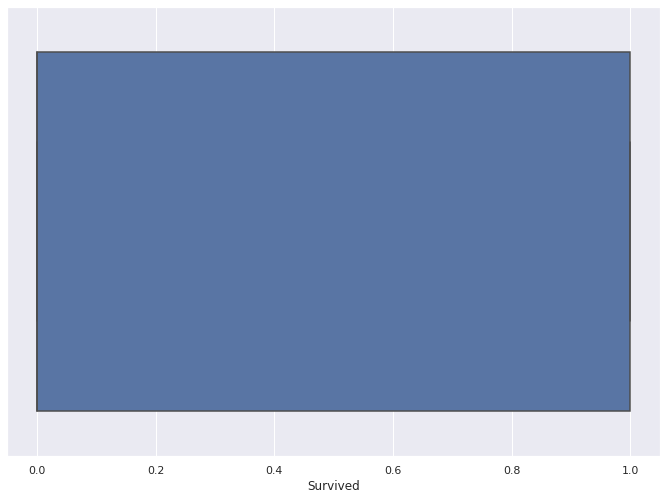

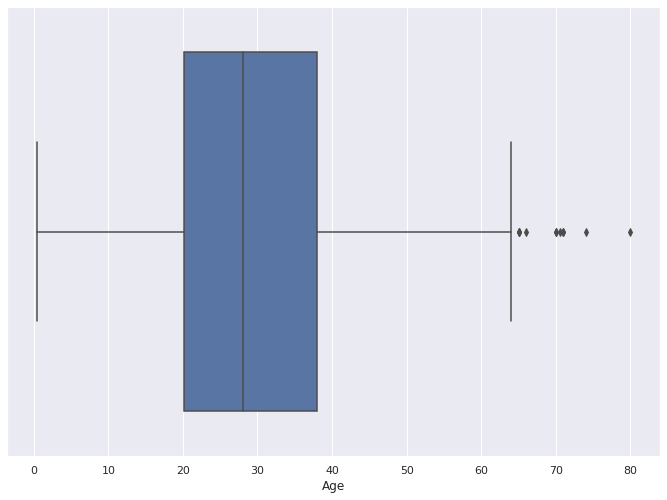

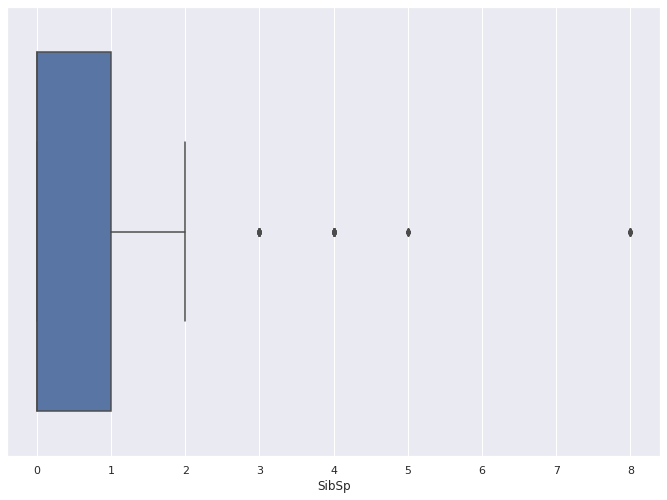

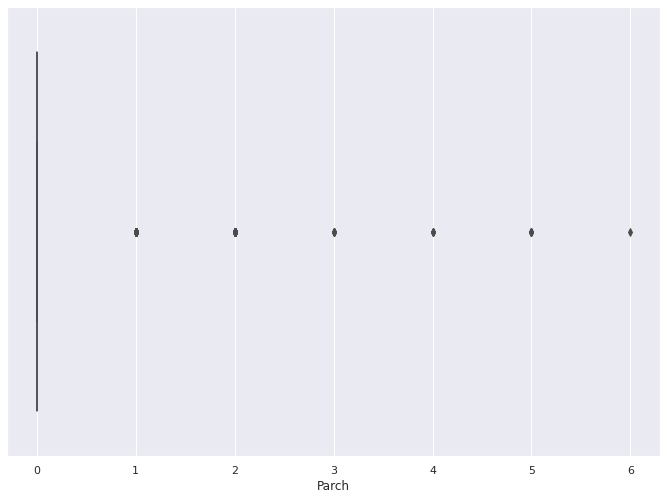

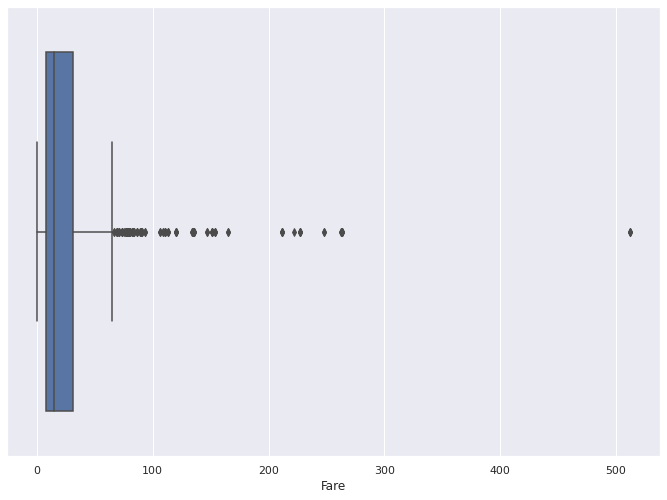

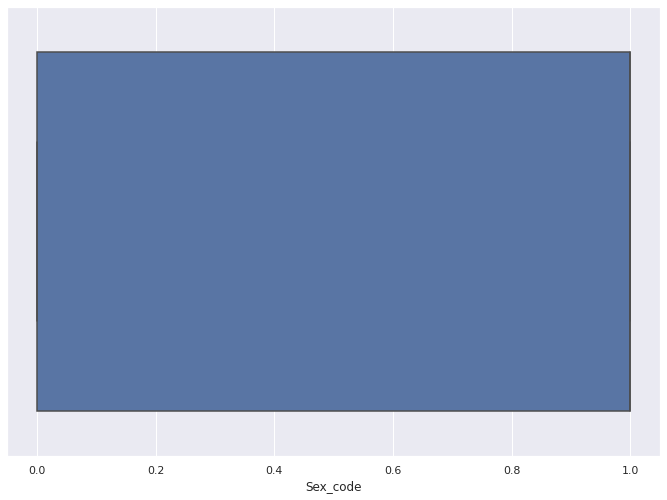

In [24]:
# outlier detection
# we can plot scatterplot to figure out the outlier for continuous variables 
# created a loop for boxplots 
# it looks like fare columns has many outliers and age column has few outliers 
import matplotlib.pyplot as plt

df1 = train_data.select_dtypes([np.int, np.float])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.boxplot(df1[col])

In [25]:
# filling out the missing value for age as we cannot ignore 177 rows which are missing from the age column as out dataset is too small. 
# we have seen that age is highly correlated with pclass, sibsp, and parch so the strategy is to fill out the missing value of age with the mean age of similar rows belongs to pclass, parch and sibsp
# creating a new column with the title of the passenger
train_data['Name_title'] = train_data['Name'].str.extract('([A-Za-z]+)\.', expand=True)
train_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Name_title
0,1,0,Lower,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,Upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs
2,3,1,Lower,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,Upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs
4,5,0,Lower,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Middle,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,Rev
887,888,1,Upper,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,Miss
888,889,0,Lower,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,Miss
889,890,1,Upper,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Mr


In [26]:
test_data['Name_title'] = test_data['Name'].str.extract('([A-Za-z]+)\.', expand=True)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Name_title
0,892,Lower,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Mr
1,893,Lower,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,Mrs
2,894,Middle,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Mr
3,895,Lower,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Mr
4,896,Lower,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,Lower,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,Mr
414,1306,Upper,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,Dona
415,1307,Lower,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Mr
416,1308,Lower,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,Mr


In [27]:
# lets see the value count for each column  
train_data['Name_title'].value_counts() # we can see there are few titles which sre just mentioned in french we can rename it as a common title by mapping

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Sir           1
Capt          1
Don           1
Mme           1
Jonkheer      1
Lady          1
Ms            1
Countess      1
Name: Name_title, dtype: int64

In [28]:
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',
           'Don': 'Mr', 'Mme': 'Mrs', 'Jonkheer': 'Mr', 'Lady': 'Mrs',
           'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
train_data.replace({'Name_title': mapping},inplace=True)

#lets see the value count for each title
train_data['Name_title'].value_counts()


Mr        525
Miss      185
Mrs       128
Master     40
Dr          7
Rev         6
Name: Name_title, dtype: int64

In [29]:
mapping2 = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',
           'Don': 'Mr', 'Mme': 'Mrs', 'Jonkheer': 'Mr', 'Lady': 'Mrs',
           'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
test_data.replace({'Name_title': mapping},inplace=True)

#lets see the value count for each title
test_data['Name_title'].value_counts()

Mr        242
Miss       79
Mrs        73
Master     21
Rev         2
Dr          1
Name: Name_title, dtype: int64

In [30]:
# using median age for each group 
med_age = dict(train_data.groupby('Name_title')['Age'].median())
med_age



{'Dr': 46.5, 'Master': 3.5, 'Miss': 21.0, 'Mr': 30.0, 'Mrs': 35.0, 'Rev': 46.5}

In [31]:
# using median age for each group 
med_age2 = dict(test_data.groupby('Name_title')['Age'].median())
med_age2

{'Dr': 53.0, 'Master': 7.0, 'Miss': 22.0, 'Mr': 29.0, 'Mrs': 37.0, 'Rev': 35.5}

In [32]:
train_data['age_med'] = train_data['Name_title'].apply(lambda X: med_age[X])
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Name_title,age_med
0,1,0,Lower,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr,30.0
1,2,1,Upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs,35.0
2,3,1,Lower,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,21.0
3,4,1,Upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs,35.0
4,5,0,Lower,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Middle,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,Rev,46.5
887,888,1,Upper,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,Miss,21.0
888,889,0,Lower,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,Miss,21.0
889,890,1,Upper,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Mr,30.0


In [33]:
test_data['age_med'] = test_data['Name_title'].apply(lambda X: med_age2[X])
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Name_title,age_med
0,892,Lower,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Mr,29.0
1,893,Lower,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,Mrs,37.0
2,894,Middle,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Mr,29.0
3,895,Lower,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Mr,29.0
4,896,Lower,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,Mrs,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,Lower,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,Mr,29.0
414,1306,Upper,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,Mrs,37.0
415,1307,Lower,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Mr,29.0
416,1308,Lower,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,Mr,29.0


In [34]:
# replace all missing ages with the value in this column
train_data['Age'].fillna(train_data['age_med'], inplace=True, )
del train_data['age_med']

In [35]:
# replace all missing ages with the value in this column
test_data['Age'].fillna(test_data['age_med'], inplace=True, )
del test_data['age_med']

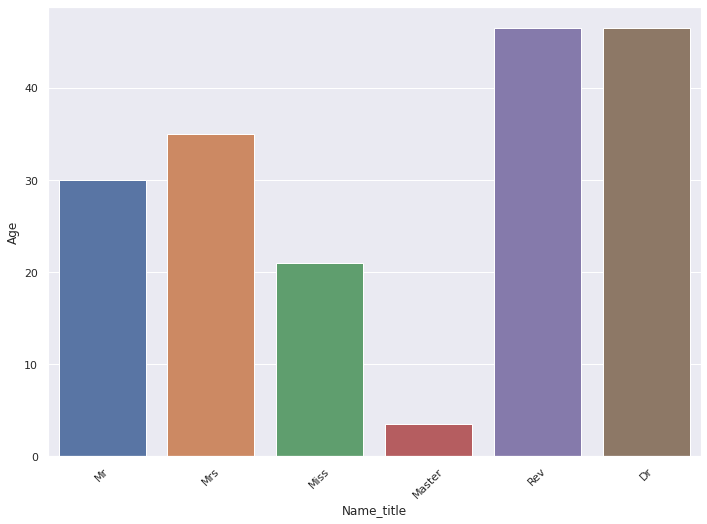

In [36]:
sns.barplot(x='Name_title', y='Age', data=train_data, estimator=np.median, ci=None)
plt.xticks(rotation=45)
plt.show()

In [37]:
# impute missing Fare values using median of Pclass groups
class_fares = dict(train_data.groupby('Pclass')['Fare'].median())

# create a column of the average fares
train_data['fare_med'] = train_data['Pclass'].apply(lambda x: class_fares[x])

# replace all missing fares with the value in this column
train_data['Fare'].fillna(train_data['fare_med'], inplace=True, )
del train_data['fare_med']

In [38]:
# impute missing Fare values using median of Pclass groups
class_fares2 = dict(test_data.groupby('Pclass')['Fare'].median())

# create a column of the average fares
test_data['fare_med'] = test_data['Pclass'].apply(lambda x: class_fares2[x])

# replace all missing fares with the value in this column
test_data['Fare'].fillna(test_data['fare_med'], inplace=True, )
del test_data['fare_med']

In [39]:
train_data['Embarked'].fillna(method='backfill', inplace=True)

In [40]:
test_data['Embarked'].fillna(method='backfill', inplace=True)

In [41]:
print(train_data.dtypes)
train_data

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Sex_code         int64
Name_title      object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Name_title
0,1,0,Lower,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,Upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs
2,3,1,Lower,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,Upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs
4,5,0,Lower,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Middle,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,Rev
887,888,1,Upper,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,Miss
888,889,0,Lower,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S,0,Miss
889,890,1,Upper,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Mr


In [42]:
print(test_data.dtypes)
test_data

PassengerId      int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Sex_code         int64
Name_title      object
dtype: object


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Name_title
0,892,Lower,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Mr
1,893,Lower,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,Mrs
2,894,Middle,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Mr
3,895,Lower,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Mr
4,896,Lower,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,Lower,"Spector, Mr. Woolf",male,29.0,0,0,A.5. 3236,8.0500,NaN,S,1,Mr
414,1306,Upper,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,Mrs
415,1307,Lower,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Mr
416,1308,Lower,"Ware, Mr. Frederick",male,29.0,0,0,359309,8.0500,NaN,S,1,Mr


## Modeling 


In [43]:
# data pre-processing with sklearn
import pandas as pd
import numpy as np
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

X = train_data.copy()
X = X.drop(['PassengerId','Name','Sex_code','Ticket','Cabin'],axis=1)


# lets do hot encoding  
X_cat = X.copy()
X_cat = X.select_dtypes(include=['object'])
X_enc = X_cat.copy()

X_enc = pd.get_dummies(X_enc, columns=['Sex','Pclass','Embarked','Name_title'])
X = X.drop(['Sex','Pclass','Embarked','Name_title'],axis=1)
train = pd.concat([X,X_enc], axis=1)
train


,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_Lower,Pclass_Middle,Pclass_Upper,Embarked_C,Embarked_Q,Embarked_S,Name_title_Dr,Name_title_Master,Name_title_Miss,Name_title_Mr,Name_title_Mrs,Name_title_Rev
0,0,22.0,1,0,7.2500,0,1,1,0,0,0,0,1,0,0,0,1,0,0
1,1,38.0,1,0,71.2833,1,0,0,0,1,1,0,0,0,0,0,0,1,0
2,1,26.0,0,0,7.9250,1,0,1,0,0,0,0,1,0,0,1,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,1,0,0,0,0,1,0
4,0,35.0,0,0,8.0500,0,1,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,0,1,0,0,0,1,0,0,0,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1,0,0,1,0,0,1,0,0,0
888,0,21.0,1,2,23.4500,1,0,1,0,0,0,0,1,0,0,1,0,0,0
889,1,26.0,0,0,30.0000,0,1,0,0,1,1,0,0,0,0,0,1,0,0


In [44]:
Y_test = test_data.copy()
Y_test = Y_test.drop(['PassengerId','Name','Sex_code','Ticket','Cabin'],axis=1)


# lets do hot encoding  
Y_test_cat = Y_test.copy()
Y_test_cat = Y_test.select_dtypes(include=['object'])
Y_test_enc = Y_test_cat.copy()

Y_test_enc = pd.get_dummies(Y_test_enc, columns=['Sex','Pclass','Embarked','Name_title'])
Y_test = Y_test.drop(['Sex','Pclass','Embarked','Name_title'],axis=1)
test = pd.concat([Y_test,Y_test_enc], axis=1)
test

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_Lower,Pclass_Middle,Pclass_Upper,Embarked_C,Embarked_Q,Embarked_S,Name_title_Dr,Name_title_Master,Name_title_Miss,Name_title_Mr,Name_title_Mrs,Name_title_Rev
0,34.5,0,0,7.8292,0,1,1,0,0,0,1,0,0,0,0,1,0,0
1,47.0,1,0,7.0000,1,0,1,0,0,0,0,1,0,0,0,0,1,0
2,62.0,0,0,9.6875,0,1,0,1,0,0,1,0,0,0,0,1,0,0
3,27.0,0,0,8.6625,0,1,1,0,0,0,0,1,0,0,0,1,0,0
4,22.0,1,1,12.2875,1,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,29.0,0,0,8.0500,0,1,1,0,0,0,0,1,0,0,0,1,0,0
414,39.0,0,0,108.9000,1,0,0,0,1,1,0,0,0,0,0,0,1,0
415,38.5,0,0,7.2500,0,1,1,0,0,0,0,1,0,0,0,1,0,0
416,29.0,0,0,8.0500,0,1,1,0,0,0,0,1,0,0,0,1,0,0


## Model Fitting

In [45]:
training_data = train.copy()
array = training_data.values
X_train = array[:,1:20]
Y_train = array[:,0]
X_train
Y_train
print(X_train.shape, Y_train.shape)



(891, 18) (891,)


In [46]:
validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=validation_size, random_state=seed)

In [93]:
####################################################
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=1000000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(criterion="entropy", max_depth=3)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF',RandomForestClassifier(n_estimators=100, max_depth=5)))


In [94]:
##################################################
# evaluate each model in turn # spot checking 
results = []
names = []

for name, model in models:
	kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.837070 (0.028303)
LDA: 0.842684 (0.030780)
KNN: 0.731808 (0.042394)
CART: 0.844053 (0.025795)
NB: 0.766804 (0.070901)
SVM: 0.668603 (0.060344)
RF: 0.845481 (0.033423)


In [95]:
# Make predictions on validation dataset
from sklearn.metrics import classification_report,accuracy_score,f1_score,roc_auc_score
RF = RandomForestClassifier(criterion='entropy', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
RF.fit(X_train, Y_train)
print(classification_report(Y_train,RF.predict(X_train)))
print(roc_auc_score(Y_train,RF.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       439
         1.0       0.91      0.81      0.86       273

    accuracy                           0.90       712
   macro avg       0.90      0.88      0.89       712
weighted avg       0.90      0.90      0.89       712

0.880397506821197


In [96]:
# predicting on test dataset
submissions = pd.read_csv('/content/drive/My Drive/Python for Data SCience /kaggle challenges/titanic/gender_submission.csv')
submissions['Survived'] = RF.predict(test).astype(int)
from google.colab import files
#files.download('my_submission.csv')
submissions.to_csv('my_submission1.csv', index=False)
files.download('my_submission1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [97]:
# fitting a model with linear discriminant analysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,Y_train)
print(classification_report(Y_train,LDA.predict(X_train)))
print(roc_auc_score(Y_train,LDA.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       439
         1.0       0.82      0.77      0.79       273

    accuracy                           0.84       712
   macro avg       0.84      0.83      0.83       712
weighted avg       0.84      0.84      0.84       712

0.8292531310754545


In [58]:
# creating a pipeline for passsing the data through model to standardize it for the models
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pipe_rf = Pipeline([('scl', StandardScaler()),
			('clf', RandomForestClassifier(random_state=42))])

pipe_rf_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(0.95)),
			('clf', RandomForestClassifier(random_state=42))])

pipe_LDA = Pipeline([('scl', StandardScaler()),
			('clf', LinearDiscriminantAnalysis())])



In [59]:
# Set grid search params
param_range = [1, 5, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_rf = [{'clf__criterion': ['gini'],
		'clf__min_samples_leaf': param_range,
		'clf__max_depth': param_range,
		'clf__min_samples_split': param_range[1:]}]

grid_params_LDA = {"clf__solver" : ["svd"],
              "clf__tol" : [0.0001,0.0002,0.0003]}








In [60]:
# construct grid searches
from sklearn.model_selection import GridSearchCV

gs_rf = GridSearchCV(estimator=pipe_rf,
    param_grid=grid_params_rf,
    scoring='accuracy',
    cv=10)

gs_LDA = GridSearchCV(estimator=pipe_LDA,
    param_grid=grid_params_LDA,
    scoring='accuracy',
    cv=10,n_jobs= 4, verbose = 1)

# List of pipelines for ease of iteration
grids = [gs_rf, gs_LDA]

# Dictionary of pipelines and classifier  for ease of reference
grid_dict = {0: 'Random Forest', 1:'Linear Discriminant analysis'}

In [61]:
# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X_train, Y_train)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(X_validation)
	# Test data accuracy of model with best params
	print('Test set accuracy score for best params: %.3f ' % accuracy_score(Y_validation, y_pred))
	# Track best (highest test accuracy) model
	if accuracy_score(Y_validation, y_pred) > best_acc:
		best_acc = accuracy_score(Y_validation, y_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Random Forest
Best params: {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10}
Best training accuracy: 0.851
Test set accuracy score for best params: 0.782 

Estimator: Linear Discriminant analysis
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best params: {'clf__solver': 'svd', 'clf__tol': 0.0001}
Best training accuracy: 0.844
Test set accuracy score for best params: 0.765 

Classifier with best test set accuracy: Random Forest


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  23 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.2s finished


In [56]:
# lets spot check for ensembles models 
clf_models = []
clf_models.append(('DT', DecisionTreeClassifier()))
clf_models.append(('RF', RandomForestClassifier()))
clf_models.append(('GBC', GradientBoostingClassifier()))
clf_models.append(('SVC', SVC(kernel='linear')))

# evaluate each model in turn # spot checking 
results = []
names = []

for name, model in clf_models:
  exec(f'clf_{name} = model.fit(X_train, Y_train)')
  msg = "Model: clf_%s , Score:%.2f" % (name, model.score(X_train, Y_train))
  print(msg)
  print(confusion_matrix(Y_validation, model.predict(X_validation)))
  print('')

Model: clf_DT , Score:0.98
[[93 17]
 [30 39]]

Model: clf_RF , Score:0.98
[[90 20]
 [22 47]]

Model: clf_GBC , Score:0.90
[[98 12]
 [25 44]]

Model: clf_SVC , Score:0.85
[[92 18]
 [25 44]]



In [75]:
X = train.copy()
X = X.drop(['Survived'], axis =1)

In [76]:
Y = train['Survived']
Y = pd.DataFrame(data = Y)
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


## Feature Importance 

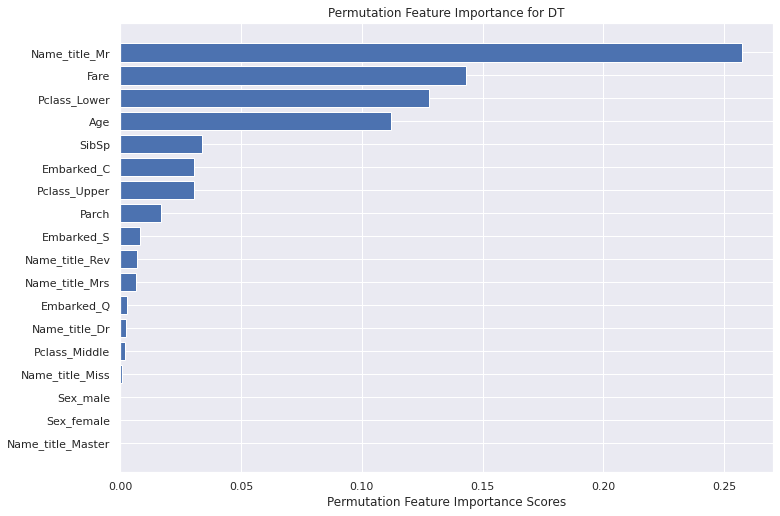

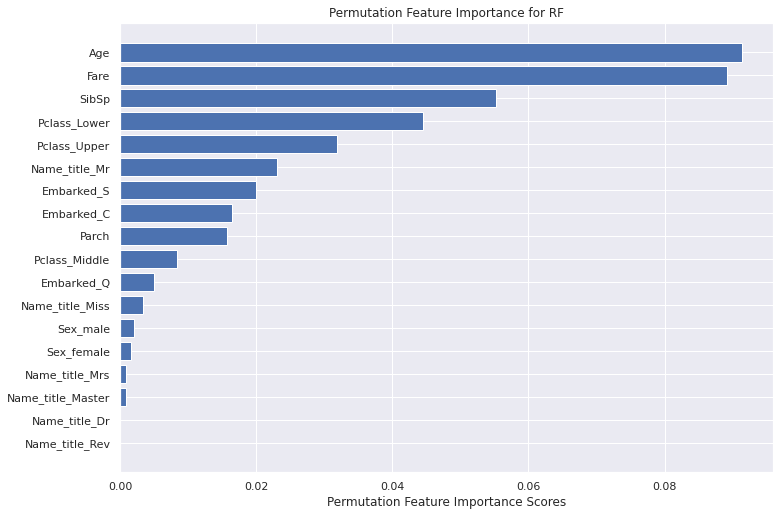

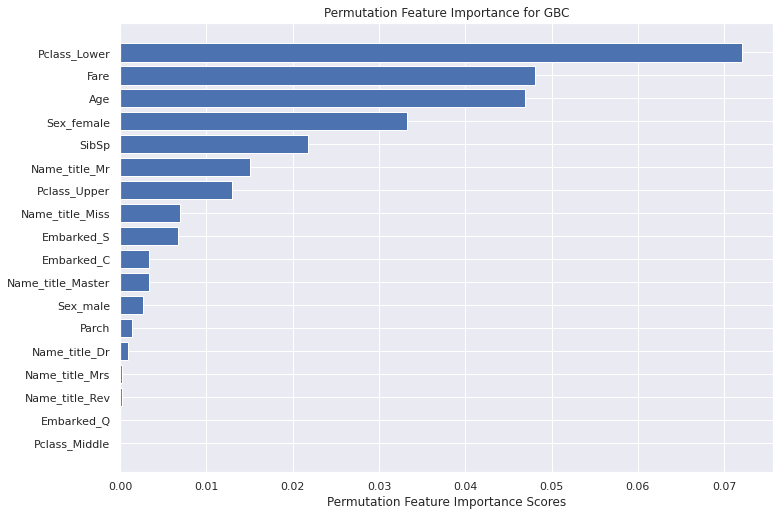

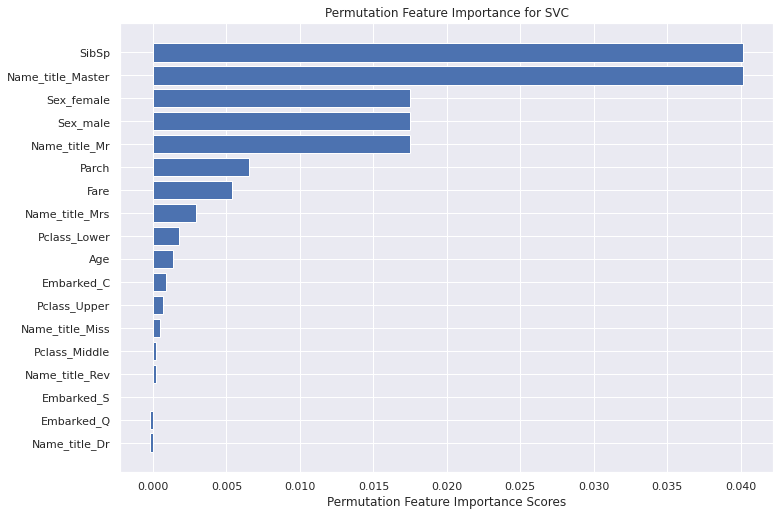

In [77]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import permutation_importance
for name, model in clf_models:
  # perform permutation importance
  results = permutation_importance(model, X, Y, scoring='accuracy')
  # get importance
  importance = results.importances_mean
  sorted_idx = np.argsort(importance)
  pos = np.arange(sorted_idx.shape[0]) + .5
  plt.barh(pos, importance[sorted_idx], align='center')
  plt.yticks(pos, X.columns[sorted_idx])
  plt.xlabel('Permutation Feature Importance Scores')
  plt.title('Permutation Feature Importance for %s' % name)
  plt.show()

In [85]:
X = train.copy()
X = X.drop(['Name_title_Rev','Name_title_Dr','Survived'], axis =1)
Y = train['Survived']
Y = pd.DataFrame(data=Y)


,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_Lower,Pclass_Middle,Pclass_Upper,Embarked_C,Embarked_Q,Embarked_S,Name_title_Master,Name_title_Miss,Name_title_Mr,Name_title_Mrs
0,22.0,1,0,7.2500,0,1,1,0,0,0,0,1,0,0,1,0
1,38.0,1,0,71.2833,1,0,0,0,1,1,0,0,0,0,0,1
2,26.0,0,0,7.9250,1,0,1,0,0,0,0,1,0,1,0,0
3,35.0,1,0,53.1000,1,0,0,0,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0,1,0,1,0,0,0,1,0,0,0,0
887,19.0,0,0,30.0000,1,0,0,0,1,0,0,1,0,1,0,0
888,21.0,1,2,23.4500,1,0,1,0,0,0,0,1,0,1,0,0
889,26.0,0,0,30.0000,0,1,0,0,1,1,0,0,0,0,1,0


In [86]:
# Make predictions on validation dataset
from sklearn.metrics import classification_report,accuracy_score,f1_score,roc_auc_score
RF = RandomForestClassifier(criterion='entropy', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
RF.fit(X, Y)
print(classification_report(Y,RF.predict(X)))
print(roc_auc_score(Y,RF.predict(X)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



              precision    recall  f1-score   support

           0       0.90      0.96      0.93       549
           1       0.92      0.83      0.87       342

    accuracy                           0.91       891
   macro avg       0.91      0.89      0.90       891
weighted avg       0.91      0.91      0.91       891

0.892795513373598


In [90]:
# predicting on test dataset
test1 = test.copy()
test1 = test1.drop(['Name_title_Rev','Name_title_Dr'],axis =1)



In [91]:
submissions = pd.read_csv('/content/drive/My Drive/Python for Data SCience /kaggle challenges/titanic/gender_submission.csv')
submissions['Survived'] = RF.predict(test1).astype(int)
from google.colab import files
#files.download('my_submission.csv')
submissions.to_csv('my_submission1.csv', index=False)
files.download('my_submission1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# pipeline https://www.analyticsvidhya.com/blog/2020/01/build-your-first-machine-learning-pipeline-using-scikit-learn/
